In [1]:
from IPython.display import display
import mangoes
import nltk
import string 
import pprint 
import os 
import datetime 

Read more for 

https://github.com/UniversalDependencies/UD_English-EWT


In [2]:
today = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")

In [3]:
OUTPUT_PATH = os.path.join(os.path.abspath(''), "output/{}".format(today))
if not os.path.exists(OUTPUT_PATH):
    print("made a dir: ", OUTPUT_PATH)
    os.makedirs(OUTPUT_PATH)   

made a dir:  /home/namiakazawa/Desktop/mangoes-new/examples/output/2021-03-09-20-03


In [4]:
today

'2021-03-09-20-03'

# Build Embedding 
### Corpus

In [9]:
UD_English_EWT = "../../UD_English-EWT-master/corpus"
# UD_English_EWT =  "../../UD_English-EWT-master/corpus/en_ewt-ud-train.conllu"
# WIKI = "../../wikipedia_data/treebank.conllu"

In [10]:
corpus = mangoes.Corpus(UD_English_EWT, 
                        reader=mangoes.corpus.CONLLU, 
                        language="English",
                        lower=True, 
                        ignore_punctuation=False)

Counting words: 0it [00:00, ?it/s]

In [11]:
print("{} sentences, {} words".format(corpus.nb_sentences, corpus.size))

29887 sentences, 615697 words


In [12]:
corpus.describe()

Name: ../../UD_English-EWT-master/corpus
Language: English
Reader: <class 'mangoes.utils.reader.ConllUSentenceGenerator'>
Parameters:
	- lower : True
	- digit : False
	- ignore_punctuation : False
Size:
	- sentences: 29887
	- total number of tokens: 615697
	- number of unique tokens: 48789


In [ ]:
# Save corpus 
# corpus_metadata = os.path.join(os.path.abspath(''), "output/{}/.corpus".format(today))
# print("Saved Corpus")
# corpus.save_metadata(corpus_metadata)

In [ ]:
# or load 
# corpus = mangoes.Corpus.load_from_metadata(corpus_metadata)

### Vocabulary
#### Target Words

In [13]:
stopwords_filter_lemma = mangoes.corpus.remove_elements(nltk.corpus.stopwords.words('english'), attribute="lemma")

Option 1: Use Lemma and POS as targetwords

In [ ]:
# target_vocabulary = corpus.create_vocabulary(attributes=("lemma","POS"), 
#                                               filters = [ stopwords_filter_lemma, 
#                                                          mangoes.corpus.remove_most_frequent(100),
#                                                          mangoes.corpus.remove_least_frequent(2)])

Option 2:

In [14]:
# option for only keeping lemma 
stopwords_filter = mangoes.corpus.remove_elements(nltk.corpus.stopwords.words('english'))

target_vocabulary = corpus.create_vocabulary(attributes="lemma", 
                                              filters = [ stopwords_filter, 
                                                         mangoes.corpus.remove_most_frequent(100),
                                                         mangoes.corpus.remove_least_frequent(2)])

Check vocabulary 

In [15]:
target_vocabulary[:10]

['story',
 'text',
 'nothing',
 'social',
 'someone',
 'horse',
 'surface',
 'stage',
 'material',
 'mention']

In [16]:
len(target_vocabulary)

17629

#### Context Words

In [17]:
context_vocabulary = corpus.create_vocabulary(attributes=("lemma","POS"), 
                                              filters = [ stopwords_filter_lemma])

In [18]:
context_vocabulary[:15]

[Token(lemma=',', POS='PUNCT'),
 Token(lemma='.', POS='PUNCT'),
 Token(lemma='I', POS='PRON'),
 Token(lemma='-', POS='PUNCT'),
 Token(lemma=')', POS='PUNCT'),
 Token(lemma='(', POS='PUNCT'),
 Token(lemma='"', POS='PUNCT'),
 Token(lemma=':', POS='PUNCT'),
 Token(lemma='also', POS='ADV'),
 Token(lemma='would', POS='AUX'),
 Token(lemma='use', POS='VERB'),
 Token(lemma='?', POS='PUNCT'),
 Token(lemma=';', POS='PUNCT'),
 Token(lemma='one', POS='NUM'),
 Token(lemma='time', POS='NOUN')]

In [19]:
len(context_vocabulary)

41667

### Context 

In [20]:
dependency_context = mangoes.context.DependencyBasedContext(entity=("lemma","POS"), 
                                                            labels=True,
                                                            collapse=True, 
                                                            vocabulary=context_vocabulary,
                                                            deprel_inverse=False)

In [ ]:
# # save vocabularies 
# target_vocabulary_file_name = "vocabulary_{}_target_words".format(len(target_vocabulary))
# context_vocabulary_file_name = "vocabulary_{}_context_words".format(len(context_vocabulary))

# # save
# target_vocabulary.save(os.path.join(os.path.abspath(''), "output/{}".format(today)), name=target_vocabulary_file_name)
# context_vocabulary.save(os.path.join(os.path.abspath(''), "output/{}".format(today)), name=context_vocabulary_file_name)

In [ ]:
# load vocabs
# target_vocabulary = mangoes.Vocabulary.load("output", target_vocabulary_file_name)
# context_vocabulary = mangoes.Vocabulary.load("output", context_vocabulary_file_name)

### Cooccurrence Matrix 

In [21]:
coocc_count = mangoes.counting.count_cooccurrence(corpus,  
                                                target_vocabulary, 
                                                context=dependency_context,
                                                )

coocc_count.pprint(display=display)

,"{'lemma': 'would', 'POS': 'AUX'}/aux","{'lemma': 'bring', 'POS': 'VERB'}/conj","{'lemma': 'act', 'POS': 'NOUN'}/obj","{'lemma': 'operation', 'POS': 'NOUN'}/nsubj","{'lemma': '.', 'POS': 'PUNCT'}/punct","{'lemma': 'people', 'POS': 'NOUN'}/nsubj","{'lemma': ',', 'POS': 'PUNCT'}/punct","{'lemma': 'survive', 'POS': 'VERB'}/ccomp","{'lemma': 'even', 'POS': 'ADV'}/advmod","{'lemma': 'Google', 'POS': 'PROPN'}/nsubj",...,"{'lemma': 'assertion', 'POS': 'NOUN'}/dep","{'lemma': 'line', 'POS': 'NOUN'}/case_like","{'lemma': 'proposition', 'POS': 'NOUN'}/nsubj","{'lemma': 'formally', 'POS': 'ADV'}/case_of","{'lemma': 'formally', 'POS': 'ADV'}/acl","{'lemma': 'understanding', 'POS': 'NOUN'}/case_in","{'lemma': 'Russellapos', 'POS': 'PROPN'}/case_of","{'lemma': 'emergence', 'POS': 'NOUN'}/nsubj","{'lemma': 'antinomy', 'POS': 'NOUN'}/nsubj","{'lemma': 'mathematics', 'POS': 'NOUN'}/case_for"
story,0,0,0,0,3,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
text,0,0,0,0,4,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nothing,0,0,0,0,7,0,8,0,0,0,...,0,0,0,0,0,0,0,0,0,0
social,0,0,0,0,2,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
someone,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grahames,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Toad,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Belgrano,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
axiomatize,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
coocc_count.shape

(17629, 64219)

In [27]:
i = 2
print("target word: ", target_vocabulary[i])
print("close words")
pprint.pprint(coocc_count.get_closest_words(target_vocabulary[i], 10))

target word:  nothing
close words
[('individually', 0.27831216351296795),
 ('fascinating', 0.27831216351296795),
 ('Karim', 0.2828912117084227),
 ('Toronto', 0.3089766809193575),
 ('refuse', 0.3255186955853393),
 ('fine', 0.3270811345673481),
 ('decide', 0.32877787078964793),
 ('fail', 0.33048730424059025),
 ('Paula', 0.330561318604797),
 ('choose', 0.33142473487810153)]


### Weighting 

In [28]:
ppmi = mangoes.weighting.PPMI()
svd = mangoes.reduction.SVD(dimensions=300)

In [29]:
embeddings = mangoes.create_representation(coocc_count, weighting=ppmi, reduction=svd)

In [30]:
embeddings.pprint(display=display)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
story,4.171802e+00,-1.184133e+00,1.731722e+00,2.780301e+00,1.274795e+00,1.163909e+00,-2.277564e+00,3.099395e+00,3.432913e-01,3.851067e+00,...,-2.907028e-01,1.685548e-01,1.171060e-01,3.935794e-02,-3.446722e-01,3.171332e-01,-3.113377e+00,-5.946602e+00,1.633835e+00,1.707147e+00
text,-1.622593e+00,-1.565548e-02,1.054578e-02,1.384609e+00,-5.358426e-02,-5.233743e-01,-7.597248e-01,7.655063e-01,1.463352e+00,-4.615723e-01,...,-6.630932e-01,-5.733963e-01,6.308390e-01,-1.082087e-01,3.800347e-01,-1.786137e-01,-3.399355e+00,-5.048604e+00,2.315774e+00,2.196368e+00
nothing,1.113897e+00,-1.602849e+00,8.060045e-02,2.708961e+00,-3.731844e-01,-1.587422e+00,4.858297e-01,-8.608600e-01,9.939244e-01,1.359493e+00,...,1.038493e+00,-4.329152e-01,-6.330873e-01,8.465400e-02,1.912015e-01,-6.135351e-01,-5.855531e-01,-1.509749e+00,1.498440e+00,9.199287e-01
social,1.609835e-01,1.666003e-02,2.955975e-01,-6.100526e-02,-4.358960e-01,1.596183e-01,3.322372e-01,1.921886e-01,2.311189e-01,6.079534e-01,...,1.991742e-01,5.713657e-03,-1.733938e-01,-2.061646e-02,2.003609e-01,-2.259981e-01,2.569199e-01,-1.744594e-02,5.201091e-01,3.352238e-01
someone,-2.035805e-01,-3.533861e-01,1.120894e+00,8.859835e-01,1.408030e+00,-1.219784e+00,-1.054411e+00,-1.417610e+00,1.036503e+00,-4.701058e-01,...,2.997557e-01,1.873024e-01,-3.485033e-02,7.737499e-02,-1.843226e-01,-3.544408e-01,-6.675708e-01,-1.550091e+00,9.075070e-01,9.307443e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grahames,7.314238e-03,-7.224150e-03,-1.282578e-03,2.926243e-03,5.501747e-03,3.810241e-03,-8.414422e-03,-2.462257e-03,1.388422e-03,-7.714286e-03,...,1.138593e-03,2.559527e-04,-5.394818e-04,3.131003e-04,-7.575782e-04,-4.919515e-06,-2.821119e-04,-4.049711e-03,8.821742e-04,1.710145e-03
Toad,-8.894864e-17,1.377252e-16,-3.514364e-17,-9.572443e-18,1.760285e-16,8.715605e-18,2.420478e-17,-1.872571e-16,-5.378581e-17,-7.329183e-17,...,-2.214228e-16,2.754400e-16,-1.411200e-16,-4.155969e-17,-6.196646e-16,-3.424328e-17,1.743438e-16,4.306520e-18,5.926597e-17,3.612250e-17
Belgrano,-8.090412e-18,5.775675e-18,-1.355355e-17,-1.699163e-17,1.137561e-17,-1.102481e-17,-6.202267e-18,1.669135e-17,-2.185609e-17,5.265576e-17,...,7.035872e-17,1.149009e-16,-4.474067e-18,-5.365101e-17,-1.513218e-16,-8.467755e-17,-7.149860e-17,6.590481e-17,9.185806e-17,1.157281e-17
axiomatize,-1.613720e-02,9.907007e-02,-8.481412e-03,1.576758e-01,-7.848208e-02,1.670485e-02,1.559463e-01,-4.340128e-02,2.085979e-02,2.160587e-02,...,-4.241293e-02,-1.233720e-01,-2.168864e-02,1.629170e-02,-4.118964e-02,-3.620486e-03,7.573502e-03,1.049489e-01,1.880400e-01,6.409067e-02


In [ ]:
# Save the embeddings 
# embedding_path = os.path.join(OUTPUT_PATH,
#                               "embeddings/ppmi_svd_{}target_words_deprel".format(len(target_vocabulary)))

In [ ]:
# embeddings.save(embedding_path)

In [ ]:
# load embedding 
# embeddings = mangoes.Embeddings.load(embedding_path)

# Explore Embedding 

In [31]:
import pandas as pd 

### Closest Words 

#### Similarities 

In [32]:
sims = {0: "cityblock",
        1: "cosine", 
        2: "euclidean", 
        3: "l1", 
        4:"l2", 
        5:"manhattan",
        6:"braycurtis", 
        7:"canberra", 
        8:"chebyshev", 
        9:"correlation", 
        10:"dice", 
        11:"hamming", 
        12:"jaccard", 
        13:"kulsinski", 
        14:"mahalanobis", 
       15: "minkowski", 
       16: "rogerstanimoto", 
       17: "russellrao", 
       18: "seuclidean", 
        19:"sokalmichener", 
        20:"sokalsneath", 
       21: "sqeuclidean", 
       22: "yule"}


In [33]:
i = 2
nb = 5

In [34]:
result = {word: pd.Series([w for w, _ in embeddings.get_closest_words(word, nb=nb, metric=sims[i])], index=range(1,nb+1))
          for word in embeddings.words[100:200:10]}
print(f"similarity measure: {sims[i]}")
print(pd.DataFrame(result).transpose())

similarity measure: euclidean
                      1          2            3             4          5
practice  understanding    inhabit       affair     mythology  prevalent
!!               baguio  Asparagae     indirect  ethnographic    pajamas
basis           marking    session       scheme       assault       hint
explain         confess     insist        reply       condemn   diminish
vote            recruit   proclaim  discontinue          peak     unable
York             Thomas     Laurie      Darrell          Lora    Student
August          January   December     February       October   November
award            winner   renowned      notably       impress       leak
special          thirst       pedi     manicure     dignitary   kindness
London           krater    Phyllis         Sara         Vince      Steve


### Analogies 

In [35]:
# Check what words are available 
question = "king queen male"
ans = "female"
for w in (question.split() + [ans]):
    try:
        embeddings.words.word_index[w]
        print(f"'{w}' exists")
    except KeyError:
        print(f"'{w}'  doesn't exist in embedding")

'king' exists
'queen' exists
'male' exists
'female' exists


In [39]:
# You can resolve analogy according to a representation using the analogy() method
# Here, we will display the results of some examples :
for analogy in [question]:
    print(analogy, '->', embeddings.analogy(analogy,5).using_cosadd)
    print(analogy, '->', embeddings.analogy(analogy,5).using_cosmul)

king queen male -> ['Pan', 'cavity', 'traveller', 'locale', 'occupant']
king queen male -> ['traveller', 'Pan', 'cavity', 'locale', 'occupant']


### Visualization

<IPython.core.display.Javascript object>


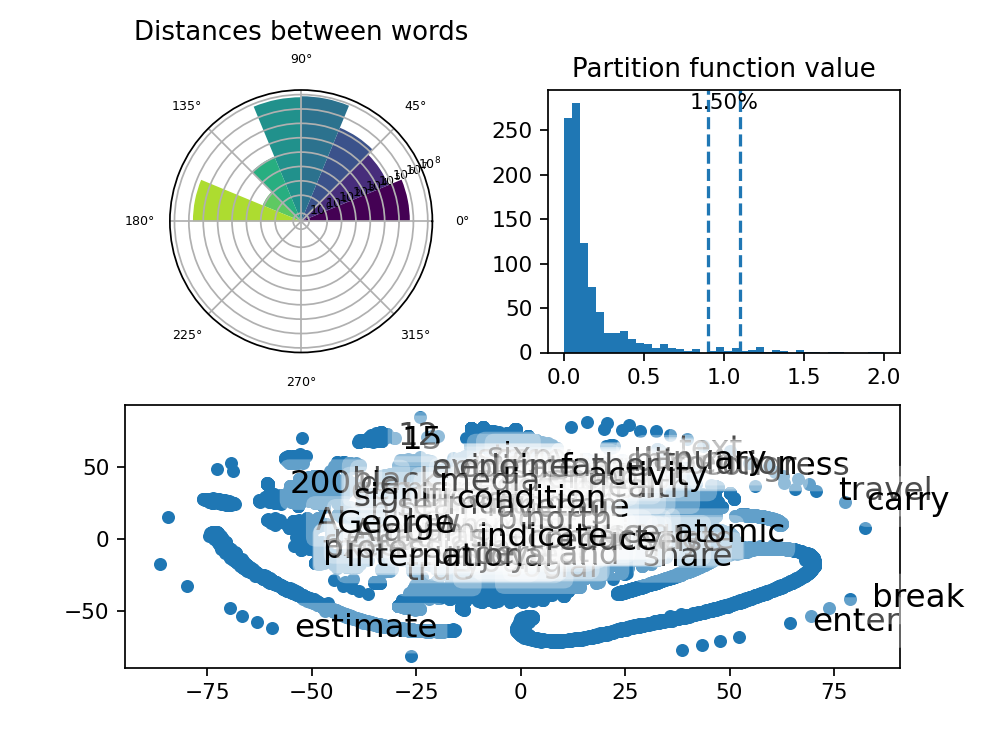

/home/namiakazawa/Desktop/mangoes/mangoes/evaluation/statistics.py:112: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cosines[[cosines > 1]] = 1
/home/namiakazawa/Desktop/mangoes/mangoes/evaluation/statistics.py:113: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cosines[[cosines < -1]] = -1


In [40]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mangoes.visualize
plt.figure()

# 1. distances between the words
ax = plt.subplot(221, projection='polar')
mangoes.visualize.plot_distances(embeddings, ax)

# 2. isotropy
ax = plt.subplot(222)
mangoes.visualize.plot_isotropy(embeddings, ax)

# 3. t-sne
plt.subplot(212)
mangoes.visualize.plot_tsne(embeddings)

plt.show()


# Evalutaion 

In [ ]:
# # Evaluate
import mangoes.evaluation.analogy

google_dataset = mangoes.evaluation.analogy.GOOGLE
msr_dataset = mangoes.evaluation.analogy.MSR

analogy_evaluation = mangoes.evaluation.analogy.Evaluation(embeddings, google_dataset, msr_dataset)
print(analogy_evaluation.get_report())